# <center> Forecasting City Finances - EDA</center>


## Import Packages
The needed packages for treating the data are imported below:

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data
We now load the data that we cleaned in the data wrangling step.

In [3]:
pwd_data = '/Users/Varishth/Desktop/Springboard_Projects/capstone_two/data/clean_fisc_data.csv'
df = pd.read_csv(pwd_data)
df.head()

,year,city_name,city_types,city_population,cpi,rev_total,rev_general,intergovt_rev,igr_federal,igr_state,...,debt_long_term,debt_private_purp,debt_issued,debt_retired,cash_holdings,cash_empl_retire,cash_other,cash_other_offsets,cash_other_bonds,cash_other_other
0,1977,AK: Anchorage,core,174500,4.044885,5342.24,4956.92,2148.77,279.32,1869.46,...,8529.47,0.0,1002.27,372.71,1977.47,319.72,1657.75,178.51,787.93,691.32
1,1978,AK: Anchorage,core,177000,3.759509,5948.99,5490.05,2468.11,403.24,2064.86,...,8418.54,0.0,2888.03,1845.05,3034.33,292.97,2741.36,187.53,1395.82,1158.01
2,1979,AK: Anchorage,core,179600,3.376308,6158.68,5746.64,2573.34,496.97,2076.37,...,8338.73,0.0,1789.67,901.94,3634.98,259.30,3375.69,249.03,1812.04,1314.62
3,1980,AK: Anchorage,core,178800,2.974757,5654.93,5210.77,2313.62,371.46,1942.16,...,8518.10,0.0,1432.56,294.31,4232.94,342.83,3890.11,986.73,1330.72,1572.66
4,1981,AK: Anchorage,core,174431,2.696590,6192.83,5736.81,2771.43,338.76,2432.67,...,8234.90,0.0,624.94,305.03,4661.89,465.51,4196.38,977.32,1549.51,1669.55


## Further field adjustments

While the above dataframe is "clean" in the sense that he has no repeated entries and no null values - we can continue to modify the fields to make the data more useful. One example is to break the `city_name` field into the city name and the state.

In [4]:
# create a new field to store the state values
df['state'] = df.city_name.str.split(pat=": ", ).str[0]

# remove the state values from the city_name field
df.city_name = df.city_name.str.split(pat=": ", ).str[1]

In [5]:
df.head()

,year,city_name,city_types,city_population,cpi,rev_total,rev_general,intergovt_rev,igr_federal,igr_state,...,debt_private_purp,debt_issued,debt_retired,cash_holdings,cash_empl_retire,cash_other,cash_other_offsets,cash_other_bonds,cash_other_other,state
0,1977,Anchorage,core,174500,4.044885,5342.24,4956.92,2148.77,279.32,1869.46,...,0.0,1002.27,372.71,1977.47,319.72,1657.75,178.51,787.93,691.32,AK
1,1978,Anchorage,core,177000,3.759509,5948.99,5490.05,2468.11,403.24,2064.86,...,0.0,2888.03,1845.05,3034.33,292.97,2741.36,187.53,1395.82,1158.01,AK
2,1979,Anchorage,core,179600,3.376308,6158.68,5746.64,2573.34,496.97,2076.37,...,0.0,1789.67,901.94,3634.98,259.30,3375.69,249.03,1812.04,1314.62,AK
3,1980,Anchorage,core,178800,2.974757,5654.93,5210.77,2313.62,371.46,1942.16,...,0.0,1432.56,294.31,4232.94,342.83,3890.11,986.73,1330.72,1572.66,AK
4,1981,Anchorage,core,174431,2.696590,6192.83,5736.81,2771.43,338.76,2432.67,...,0.0,624.94,305.03,4661.89,465.51,4196.38,977.32,1549.51,1669.55,AK


In [6]:
df.state.unique()

array(['AK', 'AL', 'AR', 'AZ', 'Average for All Cities',
       'Average for Core FiSCs', 'Average for Legacy Cities', 'CA', 'CO',
       'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY',
       'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT',
       'Median for All Cities', 'Median for Core FiSCs',
       'Median for Legacy Cities', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

On cross-checking the values for the state, we notice that there are several unexpected entries such as "Average for All Cities". Upon inspections, these entries appear to be statistical reductions of the available data (average, median...). Therefore, we conclude that these entries won't be useful for our forecasting and can be dropped.

In [7]:
df = df[~df['state'].isin(['Average for All Cities', 'Average for Core FiSCs', 'Average for Legacy Cities', 'Median for All Cities', 'Median for Core FiSCs', 'Median for Legacy Cities'])]

In [8]:
df.state.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

## Identifying the target and exploratory variables

The overarching goal of the study is to predict a city's income for the upcoming year, using currently available historical data. Therefore, the target variable from our dataset is rather intuitively the `rev_total` field.

The exploratory variables on the other hand are trickier since there are two potential approaches: 1) use historical expenditure data to predict the income (**regression type models**), or 2) use historical income data to predict future income (**auto-regressive moving average type models**). Since the data needed in the second approach is a subset of that needed for the first approach, we choose to plan for the first one. The fields that we know are not relevant without doing any EDA are the breakdown by revenue types. These are not relevant since we want to predict total revenue from either past total revenue or from past expenditures.

In [9]:
# delete any column with "rev" other than "rev_total"
target = df.rev_total
df = df[df.columns.drop(list(df.filter(regex='rev')))]

# delete any column with "igr" -- intergovernmental revenue
df = df[df.columns.drop(list(df.filter(regex='igr')))]

# delete any column with "tax" -- revenue through taxes
df = df[df.columns.drop(list(df.filter(regex='tax')))]

# delete any column with "charge" and "chg" -- revenue through governmental charges
df = df[df.columns.drop(list(df.filter(regex='charge')))]
df = df[df.columns.drop(list(df.filter(regex='chg')))]

# delete any column with "misc" -- miscellaneous genera revenue
df = df[df.columns.drop(list(df.filter(regex='misc_')))]
df.columns

Index(['year', 'city_name', 'city_types', 'city_population', 'cpi',
       'spending_direct', 'spending_general', 'education_services',
       'education', 'educ_higher', 'educ_elem_sec', 'libraries',
       'social_services', 'public_welfare', 'welfare_cash', 'welfare_vendors',
       'welfare_other', 'hospitals', 'health', 'transportation', 'highways',
       'air_transit', 'parking', 'seaport', 'public_safety', 'police', 'fire',
       'correction', 'inspection', 'envir_housing', 'natural_resources',
       'parks_recreation', 'housing_commdevt', 'sewerage', 'waste_mgmt',
       'administration', 'admin_financial', 'admin_judicial',
       'public_buildings', 'admin_other', 'interest_general', 'misc',
       'commercial_activ', 'other_gen_spending', 'spending_utility',
       'utility_water', 'utility_elec', 'utility_gas', 'utility_transit',
       'spend_liquor_store', 'sp_empl_retire_tr', 'spending_total',
       'spend_intergovt', 'spend_current_ops', 'spend_capital',
       'cap

Looking at the first few fields remaining, we quickly indentify that there are fields with similar prefixes such as `education_services`, `education`, `educ_higher` and `educ_elem_sec`. These are likely subset fields of each other and as such would represent redudancy if they are all kept. To confirm this hypothesis we can take a quick look at these fields for 5 random entries.

In [10]:
pd.concat([df[['year', 'city_name', 'education_services', 'education', 'educ_higher', 'educ_elem_sec', 'libraries']],
          pd.DataFrame(df[list(['educ_higher', 'educ_elem_sec'])].sum(axis=1), columns=['sum_educ']),
          pd.DataFrame(df[list(['educ_higher', 'educ_elem_sec', 'libraries'])].sum(axis=1), columns=['sum_education_services'])], axis=1).sample(5)

,year,city_name,education_services,education,educ_higher,educ_elem_sec,libraries,sum_educ,sum_education_services
1123,1993,San Francisco,900.17,832.75,0.0,832.75,67.42,832.75,900.17
4307,1979,Minneapolis,1132.16,1049.95,0.0,1049.95,82.21,1049.95,1132.16
404,2012,Mesa,1207.84,1181.10,0.0,1181.10,26.73,1181.10,1207.83
2285,2007,Aurora,1974.72,1866.16,0.0,1866.16,108.56,1866.16,1974.72
6845,2016,Altoona,1733.35,1731.95,0.0,1731.95,1.39,1731.95,1733.34


Taking a look at 4 fields following `education_services`, and computing the relevant sums, we notice that `education` is a subtotal of the fields `educ_higher` and `educ_elem_sec`, and `education_services` is a total of `education` and `libraries`. This confirms our hypothesis that there are redundant fields in our dataset. Therefore we check the source of the dataset to select the right level of subtotals and totals that we want to keep in our df.

In [11]:
fields_of_interest = ['year', 'city_name', 'state', 'city_types', 'city_population', 'cpi',
                      'education_services', 'social_services', 'transportation', 'public_safety', 'envir_housing',
                    'administration', 'interest_general', 'misc', 'spending_utility', 'spend_liquor_store', 
                     'sp_empl_retire_tr', 'spend_intergovt', 'spending_direct', 'salaries_wages', 'capital_general', 
                      'capital_utility', 'debt_outstanding', 'debt_issued', 'debt_retired', 'cash_holdings']

df_limited = pd.concat([df[fields_of_interest], target], axis=1).set_index('year')

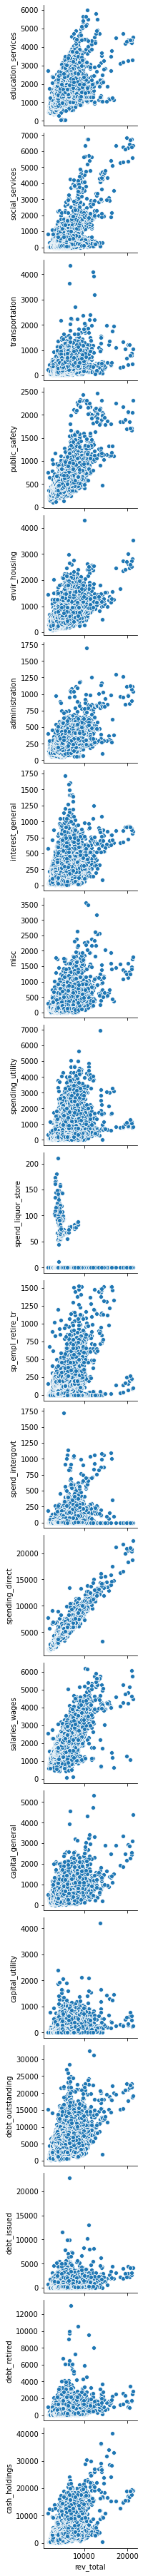

In [12]:
#fig, axes = plt.subplots(5,4,figsize=(20,20), sharex=True)
exp_var=['education_services', 'social_services', 'transportation', 'public_safety', 'envir_housing',
        'administration', 'interest_general', 'misc', 'spending_utility', 'spend_liquor_store', 
        'sp_empl_retire_tr', 'spend_intergovt', 'spending_direct', 'salaries_wages', 'capital_general', 
        'capital_utility', 'debt_outstanding', 'debt_issued', 'debt_retired', 'cash_holdings']

sns.pairplot(data=df_limited, x_vars='rev_total', y_vars=exp_var)

There are some definite correlations observable and the most significant correlation appears to be `spending_direct`. This makes sense because the total direct spending of the city should be directly correlated with the city's revenue. Therefore we conclude that trying to build a regression model will be very informative as it will only highlight the obvious cashflow of the city.

`This helps us decide that the more useful model will be a time-series analysis using the past data of each city.`

Therefore, it is now helpful to visualize the data as a function of time. We can plot the cities total revenue as a function of time and as there are a lot of cities, let us arbitrarily choose the state of California as a limiting factor.

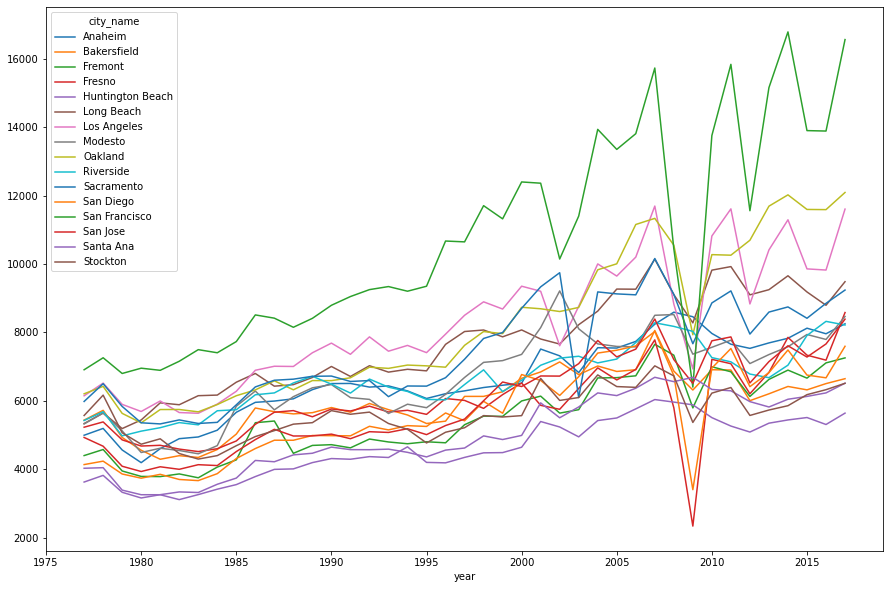

In [13]:
df_limited.loc[df_limited['state']=='CA'].pivot(columns='city_name', values='rev_total').plot(figsize=(15,10))

We notice that there is a rather well-defined upwards trend in the time series. As expected a major dip is noted in the cities' revenues for the year 2008 when the financial crisis took place.

As a sense check we can plot the same data for another state - New York.

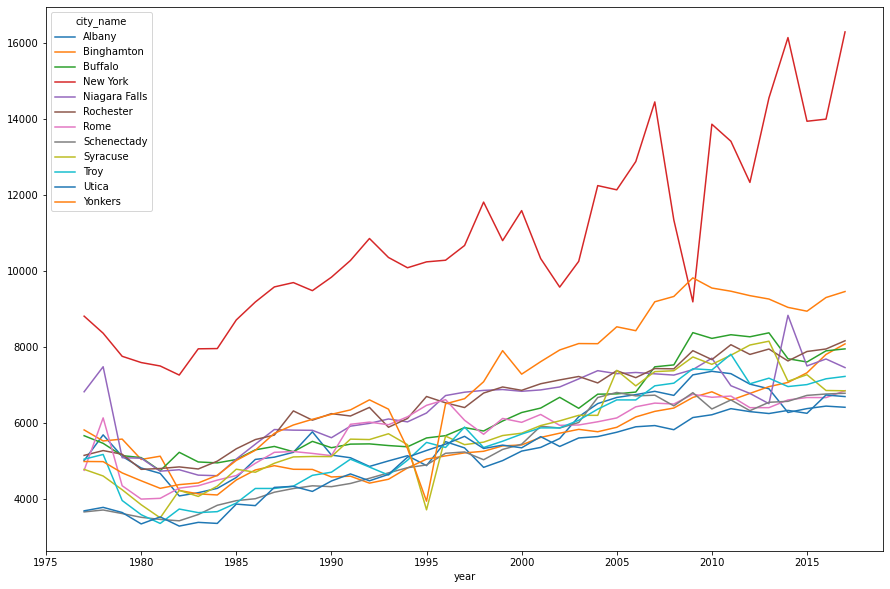

In [14]:
df_limited.loc[df_limited['state']=='NY'].pivot(columns='city_name', values='rev_total').plot(figsize=(15,10))

The same upwards trend is noted again, but this time only one city in the entire state shows a big change for the 2008 event. This makes perfect sense because New York City is the financial services hub for the state (and the country), and therefore it is expected to be the most affected by the financial crisis.

## Save Cleaned Dataframe

In [15]:
df_limited['state_city'] = df_limited['state'] + ": "+ df_limited['city_name']
df_eda = df_limited[['state_city', 'rev_total']]
df_eda.head()

,state_city,rev_total
year,,
1977,AK: Anchorage,5342.24
1978,AK: Anchorage,5948.99
1979,AK: Anchorage,6158.68
1980,AK: Anchorage,5654.93
1981,AK: Anchorage,6192.83


In [16]:
df_eda.to_csv(r'/Users/Varishth/Desktop/Springboard_Projects/capstone_two/data/timeseries_data.csv')

## Next Steps

While no seasonality is noted in the above plots, we can clearly see that the time series is not stationary. Therefore we will have to apply some transformation to make the data stationary. 